# Linear Regression in Python StatsModels

In [1]:
#import required modules
import pandas as pd, numpy as np
import os, scipy

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

## 1. Load dataset
Sklearn has several sample datasets. We would use the sample datasets. <br>
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
# Check functions under 'boston'
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
# Load all X
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
# Add outcome MEDV to the dataset (load Y)
df['MEDV'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Dataframe 'df' is ready for analysis. <br>
Dataset description can be found on: https://scikit-learn.org/stable/datasets/index.html#boston-dataset

## 2. Exploratory 

In [8]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


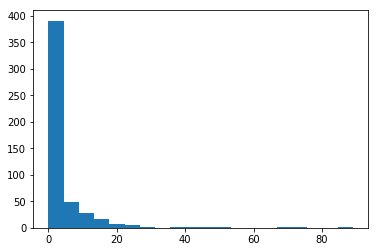

In [9]:
plt.hist(df['CRIM'], bins=20)
plt.show()

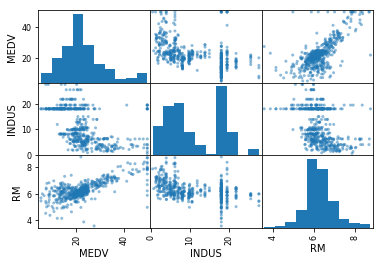

In [10]:
# Scatter matrix
pd.plotting.scatter_matrix(df[['MEDV','INDUS','RM']])
plt.show()

## 3. Linear regression (StatsModels)

In [11]:
reg = smf.ols('MEDV ~ INDUS + RM', data=df)

In [12]:
results = reg.fit()

In [13]:
# dir(result) can be used to check more functions
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     290.9
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           1.15e-84
Time:                        23:27:54   Log-Likelihood:                -1645.8
No. Observations:                 506   AIC:                             3298.
Df Residuals:                     503   BIC:                             3310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.8983      2.956     -7.747      0.000     -28.706     -17.091
INDUS         -0.3347      0.044     -7.566      0.000      -0.422      -0.248
RM             7.8221      0.432     18.109      0.000       6.973       8.671
==============================================================================
Omnibus:                      195.061   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1313.798
Skew:                           1.523   Prob(JB):                    5.16e-286
Kurtosis:                      10.282   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Diagnostics 

### There are 5 assumptions for linear regression:
1. Normal distribution
2. No multicolinearity
3. Equal variance
4. Linearity
5. No auto-correlation

We would chenk them one by one.

### 1) Test for Error Normality

In [14]:
# 1.Jarque–Bera test (skewness and kurtosis test)
JB, JBpv, skw, kurt = sm.stats.stattools.jarque_bera(results.resid)
print(JB, round(JBpv,3), skw, kurt)

1313.7976583128084 0.0 1.5232347518464466 10.28241285569768


The null hypothesis for the JB test is that the data is normally distributed; the alternate hypothesis is that the data does not come from a normal distribution. <br>Thus, a tiny p-value indicates the null hypothesis would be rejected and the error is <b>NOT normally distributed</b>.

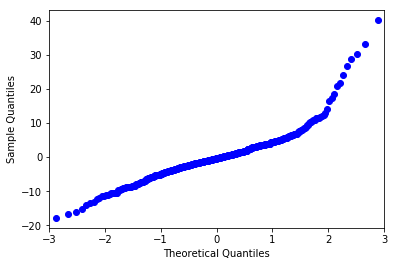

In [15]:
# 2. Normality probability plot
# Q-Q plot
sm.qqplot(results.resid)
plt.show() # Not normal

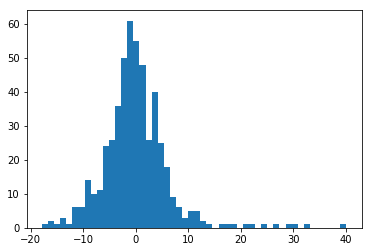

In [16]:
# Histogram
plt.hist(results.resid, bins=50)
plt.show() # Not normal

In [17]:
# 3. KS test
ksstat, kspvalue = sms.diagnostic.kstest_normal(results.resid)
print(ksstat, kspvalue)

0.09552764398717994 6.207456838699467e-12


The null hypothesis for the KS test is that the data is normally distributed. Thus, our result shows that the error is <b>NOT normally distributed </b> (which agrees with JB test).

#### Possible Solution for Non-Normal Error:
square root/ log transformation

### 2) Test for Multicollinearity

In [18]:
#1. correlation matrix - theshold 0.8
mc = scipy.corrcoef(df[['RM','INDUS']], rowvar=0)
print(mc.round(2))

[[ 1.   -0.39]
 [-0.39  1.  ]]


In [19]:
#2. Klein’s rule of thumb - theshold R square
mc2 = mc**2
print(mc2.round(3))

[[1.    0.153]
 [0.153 1.   ]]


In [20]:
#3. Variance Inflation Factor (VIF)  - theshold 4
vif = np.linalg.inv(mc)
print(vif.round(1))

[[1.2 0.5]
 [0.5 1.2]]


#### Possible Solution if multicolinearity:
regulized least squares / vairbale selection approach / combine variables (eg. height and weight -> BMI)

### 3) Test for Equal Variance

In [21]:
# Breush-Pagan test
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 22.165451484256),
 ('p-value', 1.5375645796521583e-05),
 ('f-value', 11.52173003228392),
 ('f p-value', 1.2805878626019515e-05)]

The null hypothesis of BP test is of homoskedasticity. Thus the assumption of equal variance is NOT meet.

### 4) Test for Linearity

In [22]:
# Harvey collier test
HCtvalue, HCpvalue = sms.diagnostic.linear_harvey_collier(results)

In [23]:
print(HCtvalue, HCpvalue)

-1.8442597474143434 0.06573432170410308


### 5) Autocorrelation test
<hr>
Durbin-Watson test (shown in results.summary() ) for no autocorrelation of residuals.
<hr>
The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.


### 6) Outlier and Influence Diagnostic Measures

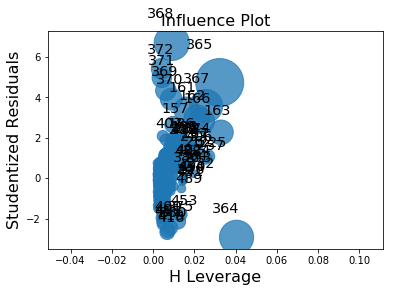

In [24]:
# Object for the analysis of influential points
infl = results.get_influence()

# Graphical representation of the influences()
sm.graphics.influence_plot(results)
plt.show()

In [25]:
# Leverage
leviers = infl.hat_matrix_diag 

n=len(df)
p=0.25

# Threshold leverage
seuil_levier = 2*(p+1)/n
print(seuil_levier)

# Identification
atyp_levier = leviers > seuil_levier
#print(atyp_levier)

# Which abservation?
print(df.index[atyp_levier],leviers[atyp_levier])

0.004940711462450593
Int64Index([  0,   2,   3,   4,   5,   8,  18,  20,  25,  36,
            ...
            476, 477, 481, 482, 488, 489, 490, 491, 492, 496],
           dtype='int64', length=237) [0.0052736  0.00524729 0.00594563 0.00655074 0.00556848 0.0053426
 0.00661985 0.00565641 0.00543098 0.00511365 0.00505849 0.00559643
 0.00555314 0.0080034  0.00616885 0.006329   0.00763483 0.00700543
 0.00612061 0.00519208 0.00641104 0.00497806 0.00684937 0.00495853
 0.00761675 0.00684225 0.00519767 0.0052941  0.00560004 0.00580764
 0.0148483  0.01171235 0.00787425 0.01097154 0.01126937 0.01115526
 0.01095024 0.01098621 0.01121947 0.01087643 0.00696311 0.00842278
 0.00706302 0.00857405 0.00790019 0.00811628 0.00684603 0.00688531
 0.00794089 0.00687869 0.0085512  0.00684146 0.00726137 0.00732877
 0.01013915 0.00637237 0.00605796 0.01012934 0.00513618 0.00545462
 0.00990454 0.00771193 0.00555257 0.00512253 0.00636723 0.00910839
 0.00524167 0.00513444 0.00517685 0.00712766 0.00968588 0.005043

## ....Working on Further Contents...